In [1]:
%matplotlib inline
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%load_ext autoreload
%autoreload 2

# Le Ring

Une fois le RRNN créé, paramétré et optimisé, nous lui ajoutons certaines propriétés dans le but de le transformer en "ring". Ce dernier va nous permettre d'implémenter le modèle de la sélectivité à l'orientation reproduisant ce qui peut être observé au sein des colonnes corticales du cortex visuel primaire.

Le ring est un réseau récurrent disposant d'une certaine topologie. En effet, selon sa position dans le réseau, un neurone possède une certaine sélectivité à l'orientation et les connexions sont locales dans l'espace des orientations. 
Quelques propriétés de la réponse à l'orientation vont conditionner cette sélectivité et induire un certain comportement du réseau, en réponse à une orientation présentée sur son entrée :

-  $m$ est l'angle d'orientation préferée d'un neurone. Cela signifie que ce dernier aura une réponse maximale si une orientation d'un angle $\theta$, tel que $\theta = m$, est présentée. Notons que le ring est construit de telle sorte que toutes les orientations sont codées avec une précision de vingt minutes d'arc et qu'il est non orienté, ainsi $0\leq m \leq \pi$.
- la bandwidth $\sigma$ est la largeur à mi-hauteur de la courbe d'accord d'un neurone. Elle sert à représenter la sélectivité de la réponse neuronale à d'autres orientations que celle préferée. Dans ce modèle, les bandwidth ne sont pas paramétrés par neurone mais plutôt par type de connexion entre les populations E et I. Nous implémentons également une bandwidth dans les connexions entre la source et la population E. Ainsi, nous cherchons à ce que les neurones d'une colonne corticale aient une certaine bandwith de sélectivité à l'orientation du fait de leurs connexions avec d'autres colonnes.

Une fonction d'accord est aussi implémentée. Cette fonction permet de calculer le poids synaptique de chacune des connexions d'une projection à partir des propriétés décrites plus haut. De part sa généralité, nous utiliserons une loi de Von Mises (loi normale circulaire) définie par :

$$
f(\theta) = \frac{1}{Z(\kappa)} \cdot e^{\kappa{cos(2(\theta - m))}}
$$
où $Z$ est la fonction de normalisation. Par analogie avec la déviation standard d'une loi Gaussienne, on définit $\kappa = \frac {1}{\sigma^{2}}$. Notons que $f(\theta+\pi) = f(\theta)$.



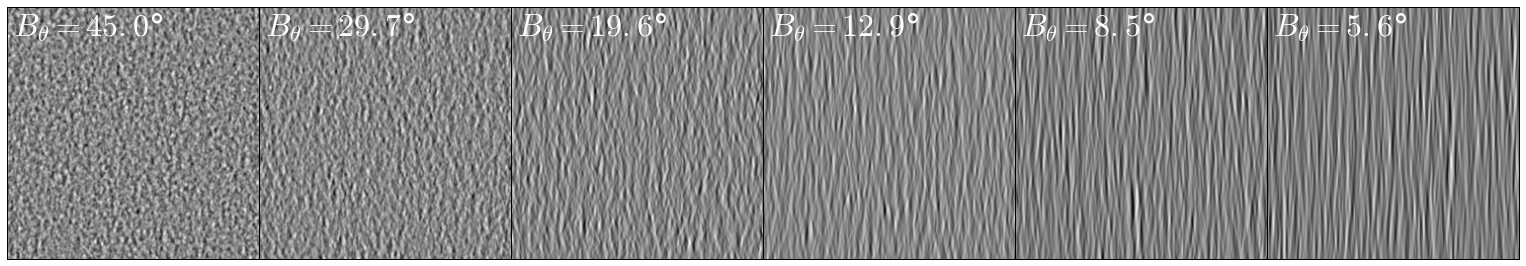

In [2]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 16)


N_theta = 6
bw_values = np.pi*np.logspace(-2, -5, N_theta, base=2)
fig_width = 21


fig, axs = plt.subplots(1, N_theta, figsize=(fig_width, fig_width/N_theta))
for i_ax, B_theta in enumerate(bw_values):
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0.,  
                                         theta=np.pi/2, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
                
    axs[i_ax].imshow(im[:, :, 0], cmap=plt.gray())
    axs[i_ax].text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='white', fontsize=32)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

import os
fig.savefig(os.path.join('../figs', 'orientation_tuning.png'))